# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_NGS_cat.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J104834.640+553618.070,162.1443344,55.6050193754,18.6822,22.8993,14.4709,8.36629,13.5372,3.72479,8.77653,14.4887,3.80497,-0.639385,-0.0479644,-2.45528,4.49029,6.87815,5.81639,0.998984,0.999002,1.00176,2000.0,2000.0,2000.0,0.005,0.409,0.765
HELP_J104910.454+554135.336,162.293559631,55.6931488629,0.932304,2.17068,0.247906,1.60998,3.67041,0.458085,1.69476,3.6955,0.431054,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,0.998478,1.00032,0.998596,2000.0,2000.0,2000.0,0.0,0.835,0.018
HELP_J104911.099+554218.548,162.29624584,55.7051523559,5.90128,9.79081,2.37818,5.20762,8.56113,1.8336,0.748596,1.85382,0.200619,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,1.00125,1.00109,0.999617,2000.0,2000.0,2000.0,0.0,0.011,0.01
HELP_J104919.290+554303.561,162.330374299,55.7176559469,8.91471,12.4133,5.49685,4.01378,7.56245,1.54966,2.49291,5.49298,0.70197,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,1.00144,0.998642,1.00098,2000.0,2000.0,2000.0,0.044,0.002,0.002
HELP_J104914.098+554211.057,162.308741513,55.7030714689,5.75756,9.5809,2.51465,1.92868,4.37767,0.507846,1.43475,3.65942,0.411179,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,1.00472,0.998532,0.999518,1232.0,2000.0,2000.0,0.0,0.014,0.021
HELP_J104910.874+554227.417,162.295306988,55.7076158319,7.15402,11.1699,3.10593,3.48711,7.03781,1.022,0.858436,2.20014,0.235336,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,1.00149,1.00426,0.999268,1803.0,2000.0,2000.0,0.0,0.046,0.025
HELP_J104914.130+554220.288,162.308873375,55.7056354849,5.37573,9.26315,1.94113,3.51462,6.9576,0.977503,1.81189,4.17269,0.430488,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,1.00344,0.999419,0.999885,1349.0,2000.0,2000.0,0.0,0.005,0.021
HELP_J104915.629+554234.317,162.315121515,55.7095323649,19.5074,22.9622,16.1829,10.5497,14.2025,7.01161,4.14497,7.88863,1.17784,-1.42522,-3.68905,-3.72513,4.15583,4.76587,4.73713,0.998784,0.998875,1.0021,2000.0,2000.0,2000.0,0.0,0.062,0.008


## Look at Symmetry of PDFs to determine depth level of catalogue

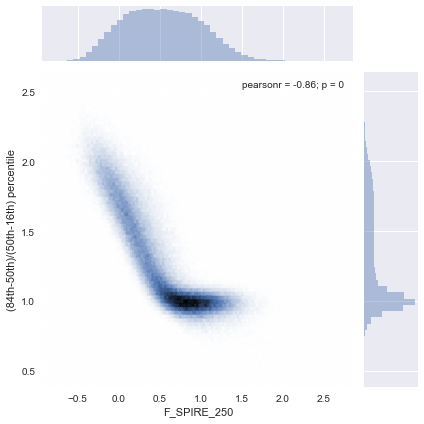

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

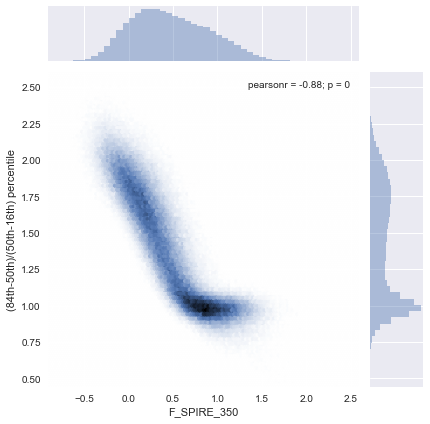

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

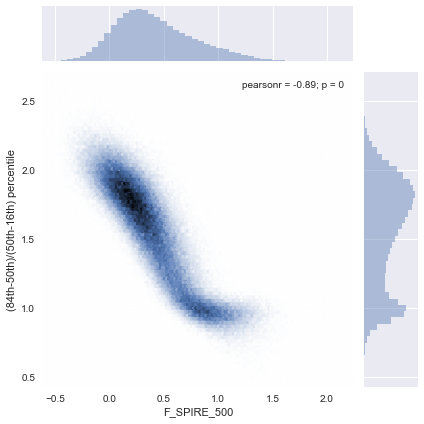

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 4)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 4)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)

In [9]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

165875 188114 209438 242065


In [10]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True

In [11]:
cat.write('./data/dmu26_XID+SPIRE_NGS_20190225.fits', format='fits',overwrite=True)